In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_excel("EastWestAirlines.xlsx")
df

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


# EDA

In [3]:
## Looks like some description about data, lets see any additional sheets are there

In [4]:
df1=pd.ExcelFile("EastWestAirlines.xlsx")
df1.sheet_names

['Description', 'data']

In [5]:
Description=pd.read_excel("EastWestAirlines.xlsx", sheet_name= "Description")
Description

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [6]:
airline=pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airline.drop("ID#", axis=1, inplace=True)
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
airline[airline.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
airline.drop_duplicates(inplace=True)

In [11]:
airline.duplicated().value_counts()

False    3998
dtype: int64

# Normalization

In [12]:
airline_norm=pd.DataFrame(normalize(airline),columns=airline.columns)
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3994,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3995,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3996,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


# H-Clustering

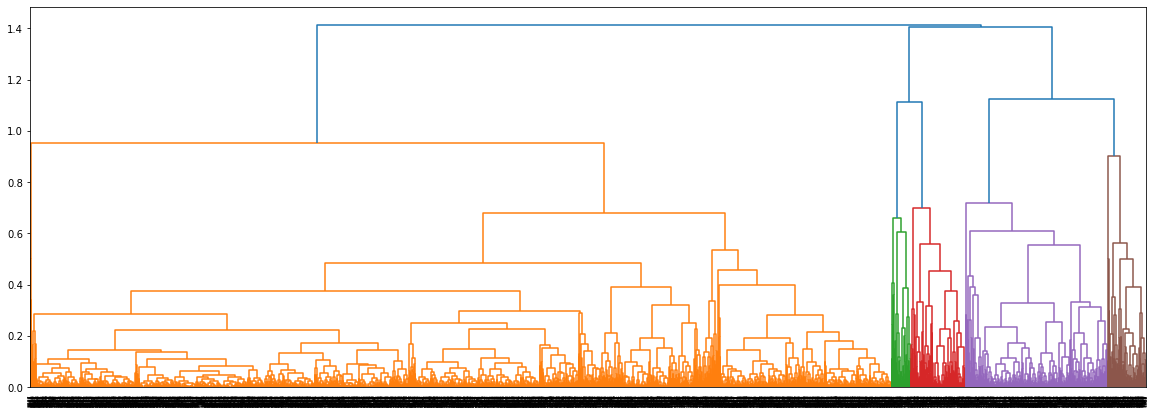

In [13]:
plt.figure(figsize=(20, 7))  
dendograms=sch.dendrogram(sch.linkage(airline_norm,'complete'))

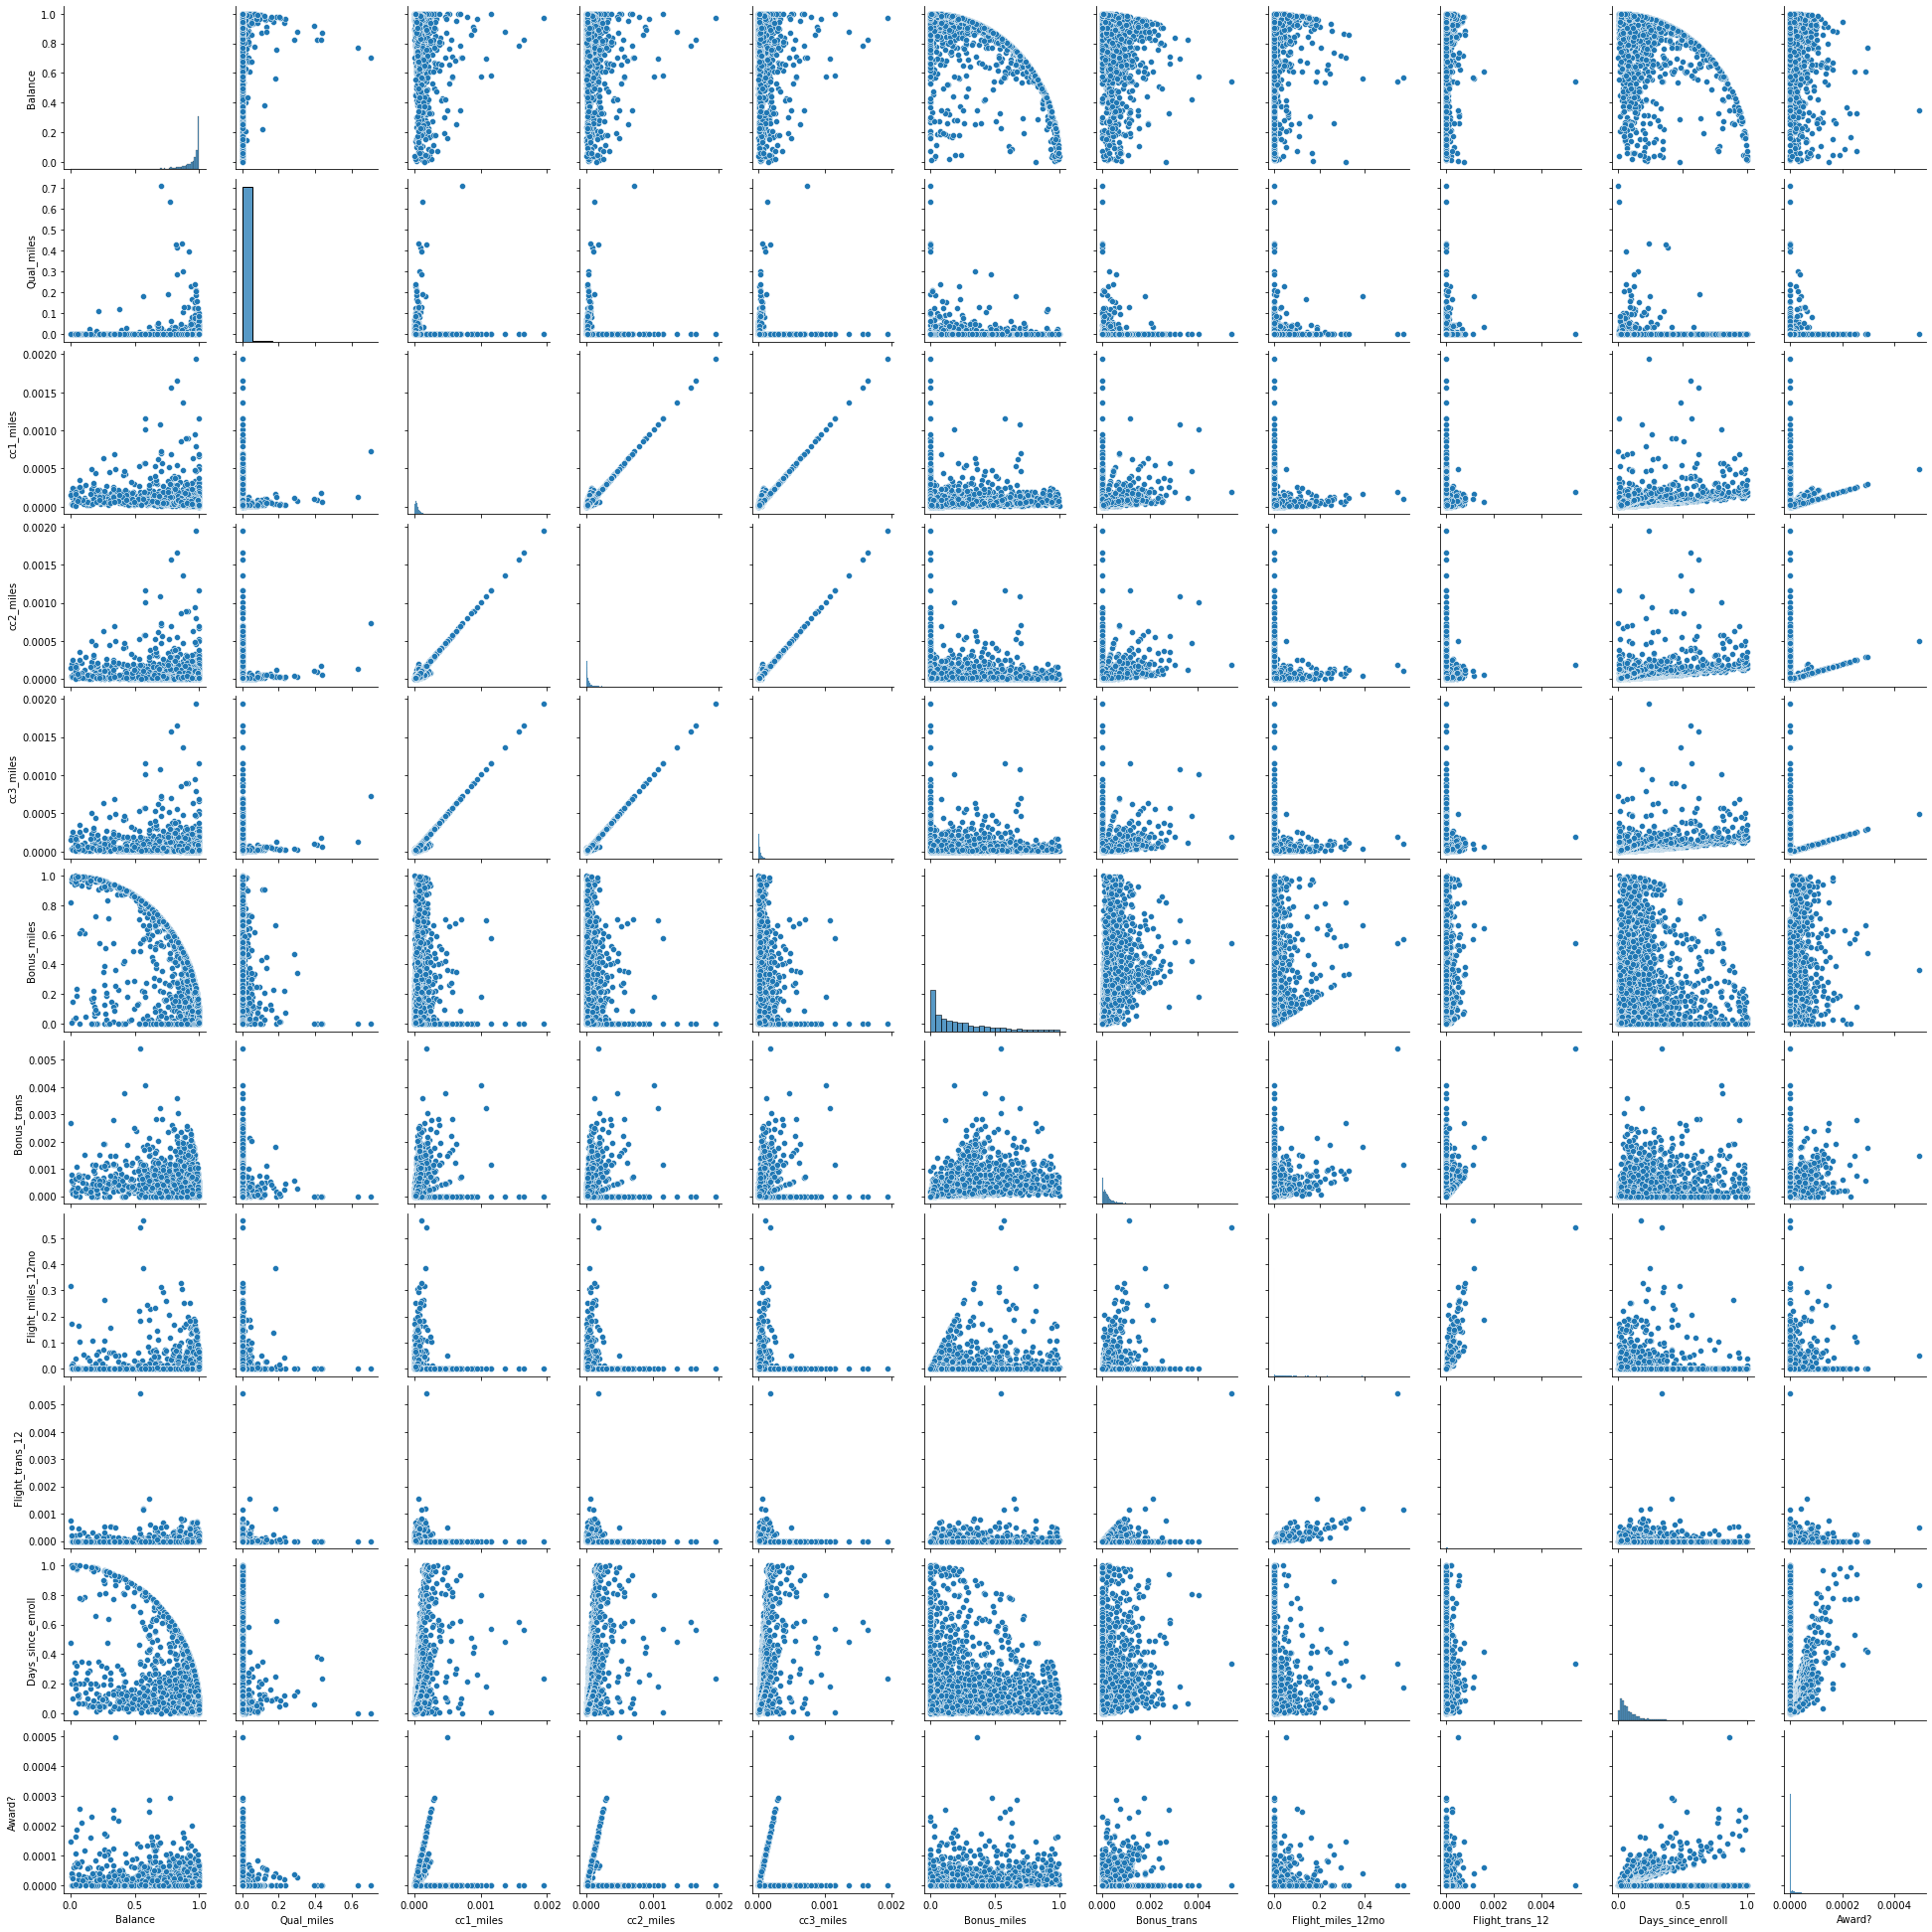

In [14]:
sns.pairplot(airline_norm)

In [15]:
hclusters=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [16]:
y_hr=pd.DataFrame(hclusters.fit_predict(airline_norm),columns=['h-clusters'])
y_hr

,h-clusters
0,1
1,1
2,1
3,1
4,0
...,...
3993,0
3994,1
3995,1
3996,1


In [17]:
y_hr.value_counts()

h-clusters
1             2738
0             1032
2              228
dtype: int64

In [18]:
airline['h-cluster']=hclusters.labels_
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h-cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [19]:
airline.groupby('h-cluster').agg(['mean']).reset_index()

,h-cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,52668.701550,103.471899,3.271318,1.030039,1.043605,37729.176357,17.566860,503.352713,1.510659,4141.220930,0.671512
1,1,87185.011687,170.754565,1.691381,1.009861,1.001461,10771.319211,10.123083,476.612126,1.419284,4046.725712,0.276844
2,2,5544.065789,8.793860,1.000000,1.000000,1.000000,587.096491,2.412281,67.276316,0.210526,4889.679825,0.131579


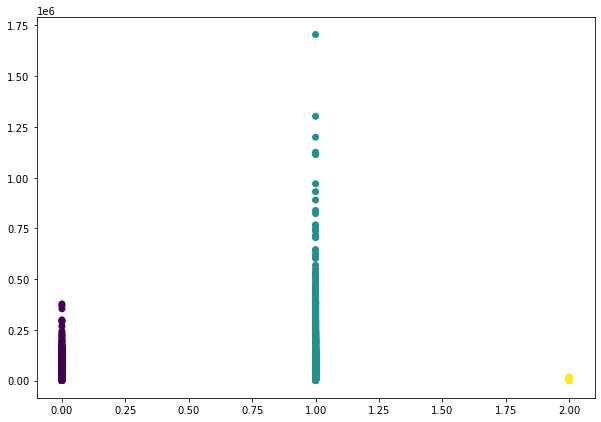

In [20]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['h-cluster'],airline['Balance'], c=hclusters.labels_) 

In [21]:
from sklearn.metrics import silhouette_score
h_score = silhouette_score(airline_norm, hclusters.labels_, metric='euclidean')
h_score

0.5500586689484881

In [22]:
## This is less sihouette score so model is not performing well ideally morethan 0.8

# DB SCAN

In [23]:
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3994,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3995,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3996,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [24]:
dbscan=DBSCAN(eps=0.15,min_samples=3)
dbscan.fit(airline_norm)

DBSCAN(eps=0.15, min_samples=3)

In [25]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2], dtype=int64)

In [27]:
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h-cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [28]:
airline["db_cluster"]=dbscan.labels_
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h-cluster,db_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [29]:
airline.groupby('db_cluster').agg(["mean"]).reset_index()

,db_cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h-cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,10766.437500,2197.625000,1.812500,1.000000,1.000000,11082.437500,15.562500,2981.000000,8.000000,3777.375000,0.56250,0.437500
1,0,73985.943899,132.471698,2.062642,1.014591,1.012327,17196.530063,11.598491,447.327044,1.342642,4121.375094,0.36956,0.801006
2,1,8844.500000,0.000000,1.000000,1.000000,1.000000,7178.500000,10.750000,3485.500000,7.000000,3796.500000,0.75000,0.000000
3,2,9647.000000,4859.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3477.333333,0.00000,1.000000


In [30]:
from sklearn.metrics import silhouette_score
db_score = silhouette_score(airline_norm, dbscan.labels_, metric='euclidean')
db_score

0.24743576695301805

In [31]:
## This is less sihouette score so model is not performing well

# K-Means Clustering

In [32]:
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3993,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3994,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3995,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3996,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


In [33]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=123)
    kmeans.fit(airline_norm)
    wcss.append(kmeans.inertia_)

In [34]:
wcss

[484.1551808734086,
 266.8716305003833,
 173.2189576462051,
 116.27460673404157,
 90.78739877863455,
 70.43602593110167,
 60.03687396516846,
 51.84311494991354,
 47.08253538799097,
 43.02555341129911]

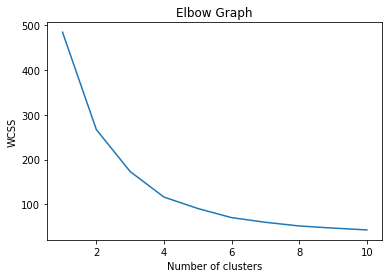

In [35]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
## Based on knee plot we build 4 clusters

In [37]:
k_clusters=KMeans(4,random_state=123).fit(airline_norm)
k_clusters

KMeans(n_clusters=4, random_state=123)

In [38]:
k_clusters.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [39]:
np.unique(k_clusters.labels_)

array([0, 1, 2, 3])

In [40]:
airline["k_clusters"]=k_clusters.labels_
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h-cluster,db_cluster,k_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,0,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0,2


In [41]:
airline["k_clusters"].value_counts()

2    2303
1    1090
3     364
0     241
Name: k_clusters, dtype: int64

In [42]:
k_clusters.cluster_centers_

array([[6.28485341e-01, 9.34219672e-04, 2.04985632e-04, 2.04781940e-04,
        2.04532092e-04, 1.24495068e-01, 4.78390538e-04, 6.68910624e-03,
        2.25316675e-05, 6.88449168e-01, 2.60055371e-05],
       [8.99048678e-01, 2.03403471e-03, 5.68074076e-05, 3.01913199e-05,
        2.95156437e-05, 4.03089039e-01, 4.02398112e-04, 7.62262675e-03,
        2.24052643e-05, 8.50654942e-02, 9.73901648e-06],
       [9.82878899e-01, 3.71612347e-03, 4.15057209e-05, 3.77179195e-05,
        3.76205578e-05, 8.06914054e-02, 1.57453088e-04, 6.65079627e-03,
        2.12921781e-05, 1.03324885e-01, 4.81770304e-06],
       [5.23653977e-01, 2.37603195e-03, 9.13653056e-05, 4.56081254e-05,
        4.45095230e-05, 7.97866700e-01, 5.07019477e-04, 1.75075997e-02,
        5.89123100e-05, 1.31443994e-01, 3.00837174e-05]])

In [43]:
airline.groupby('k_clusters').agg(['mean']).reset_index()

,k_clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h-cluster,db_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5146.381743,8.319502,1.004149,1.004149,1.000000,895.087137,3.024896,66.742739,0.195021,4856.709544,0.186722,1.792531,-0.008299
1,1,72378.903670,119.606422,3.077982,1.024771,1.018349,31486.477982,17.476147,445.017431,1.317431,4044.253211,0.477064,0.408257,0.000917
2,2,88484.857577,175.062961,1.495441,1.008250,1.001737,8110.131568,8.770734,476.973079,1.439427,4060.013895,0.255319,1.006079,0.001303
3,3,28617.579670,112.000000,3.280220,1.030220,1.068681,42166.565934,17.634615,659.725275,1.909341,4229.689560,0.901099,0.000000,-0.021978


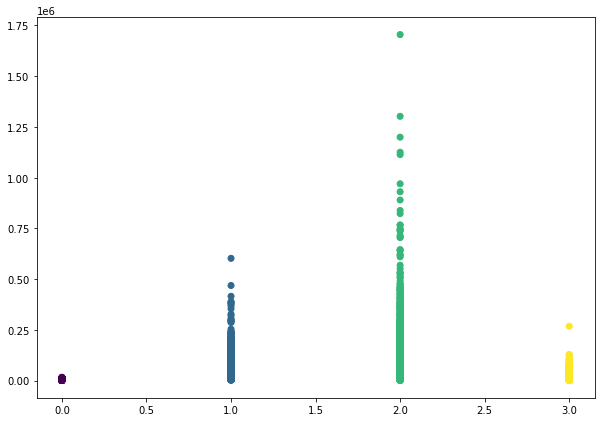

In [44]:
plt.figure(figsize=(10, 7))  
plt.scatter(airline['k_clusters'],airline['Balance'], c=k_clusters.labels_) 

In [45]:
from sklearn.metrics import silhouette_score
k_score = silhouette_score(airline_norm, k_clusters.labels_, metric='euclidean')
k_score

0.49314398364826895

In [46]:
## hierarchical_silhouette score=0.55
## DB_SCAN_silhouette score=0.24
## K-Means_silhouette score=0.49

## Based on three types of clustering methods hierarchical is performing good based on silhouette score